<a href="https://colab.research.google.com/github/sanju4n3ro/inteligencia-artificial/blob/main/Pr%C3%A1ctica_3_Adaline_multicapa_Fuente_de_datos_personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

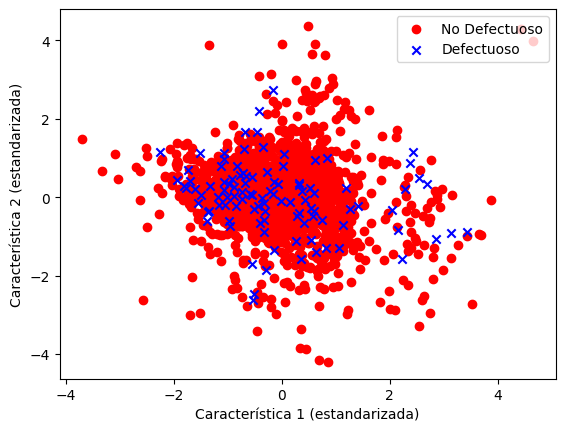

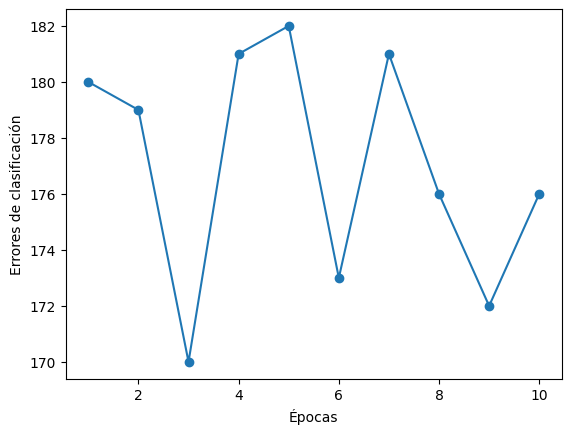

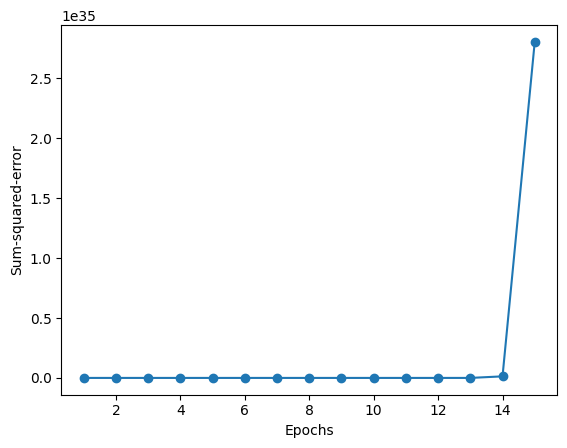

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Clase Perceptrón
class Perceptron(object):
    # Changed _init_ to __init__
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)



# Cargar el dataset SECOM
url_labels = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'

# Cargar los datos
df_labels = pd.read_csv(url_labels, sep=' ', header=None)
df_data = pd.read_csv(url_data, sep=' ', header=None)

# Imputación de valores faltantes (sustituyendo NaN con la media de cada columna)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df_data)

# Escalado de las características
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Etiquetas: 1 es defectuoso, -1 es no defectuoso
y = df_labels[0].values
y = np.where(y == 1, 1, -1)

# Visualización (usaremos las primeras dos características para simplificar la visualización)
plt.scatter(X_std[y == -1][:, 0], X_std[y == -1][:, 1], color='red', marker='o', label='No Defectuoso')
plt.scatter(X_std[y == 1][:, 0], X_std[y == 1][:, 1], color='blue', marker='x', label='Defectuoso')
plt.xlabel('Característica 1 (estandarizada)')
plt.ylabel('Característica 2 (estandarizada)')
plt.legend(loc='upper right')
plt.show()

# Entrenar el Perceptrón
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_std[:, :2], y)

# Graficar los errores por época
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Errores de clasificación')
plt.show()

class AdalineGD(object):

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Entrenar Adaline con descenso de gradiente
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std[:, :2], y)

# Graficar el costo por época
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()